Dataset:https://github.com/Helsinki-NLP/XED/tree/master/AnnotatedData



# **Imports and Installs**

In [1]:
!pip install transformers
!pip install sentencepiece
!pip install --upgrade pip
!pip install pandas 
!pip install beautifulsoup4
!pip install "transformers == 4.16.2"
!pip install sentencepiece
!pip install matplotlib
!pip install sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [2]:
import pandas as pd
import numpy as np
import re
from bs4 import BeautifulSoup

from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset
MODEL_TYPE = 'xlm-roberta-base'
from transformers import AutoTokenizer, AutoModel, AutoConfig
from transformers import AutoModelForSequenceClassification
from torch.utils.data import DataLoader
import numpy as np
from scipy.special import softmax
# Might want to change this to xlm-roberta-large and see the results, may be better or worse?

tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_TYPE)
from transformers import pipeline
model_path = "cardiffnlp/twitter-xlm-roberta-base-sentiment"
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("It' just a test!")


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/841 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

[{'label': 'neutral', 'score': 0.7508566379547119}]

# Data Pre-Processing


## Importing DataSet


In [3]:
import string 
df_en = pd.read_csv('./en-projections.tsv', sep='\t', names=["text", "category"])
df_en['lang'] = 'en'
df_en.head()


df_fr = pd.read_csv('./fr-projections.tsv', sep='\t', names=["text", "category"])
df_fr['lang'] = 'fr'
df_fr.head()

df = df_en.append(df_fr, ignore_index=True)
df.head()
df.shape

# # This adds both dataframes together, en + fr
# df = [df_en, df_fr]
# df = df_en.append(df_fr)
# df.shape
# # Might need to clean up items with more than 1 emotion?


# df.head()

# Clean_data regex based on https://medium.com/@keruchen/train-a-xlm-roberta-model-for-text-classification-on-pytorch-4ccf0b30f762
def clean_data(text):
  if(type(text) == float): # don't really know why it's giving a float for this? I think it's readng nan as NaN
    return "text" # This is bad, need to fix this 
  text = text.lower()
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
  text = re.sub(r'[^ \w\.]', '', text) 
  text = re.sub('\w*\d\w*', '', text)
  return text

df['text'] = df.text.apply(lambda x: clean_data(x))

df.head()
df.text.values[8000]

# Change to 1 category per!
df["category"] = df["category"].str[:1]
df.head()


# Add similar categories together
df['category'] = df.category.str.replace("1", "anger")
df['category'] = df.category.str.replace("2", "joy")
df['category'] = df.category.str.replace("3", "fear")
df['category'] = df.category.str.replace("4", "fear")
df['category'] = df.category.str.replace("5", "joy")
df['category'] = df.category.str.replace("6", "sadness")
df['category'] = df.category.str.replace("7", "surprise")
df['category'] = df.category.str.replace("8", "neutral")
df['category'] = df.category.str.replace("0", "neutral")
df.head()

<ipython-input-3-036a2b7d4b0a>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df_en.append(df_fr, ignore_index=True)


,text,category,lang
0,the fire went out,joy,en
1,look whos here,surprise,en
2,stop mumbling,anger,en
3,does anything ever happen here,anger,en
4,no no pictures,anger,en


Token indices sequence length is longer than the specified maximum sequence length for this model (3200 > 512). Running this sequence through the model will result in indexing errors


max:  3200
min:  2


(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 [Text(0, 0.0, '0'),
  Text(0, 2000.0, '2000'),
  Text(0, 4000.0, '4000'),
  Text(0, 6000.0, '6000'),
  Text(0, 8000.0, '8000'),
  Text(0, 10000.0, '10000'),
  Text(0, 12000.0, '12000'),
  Text(0, 14000.0, '14000'),
  Text(0, 16000.0, '16000')])

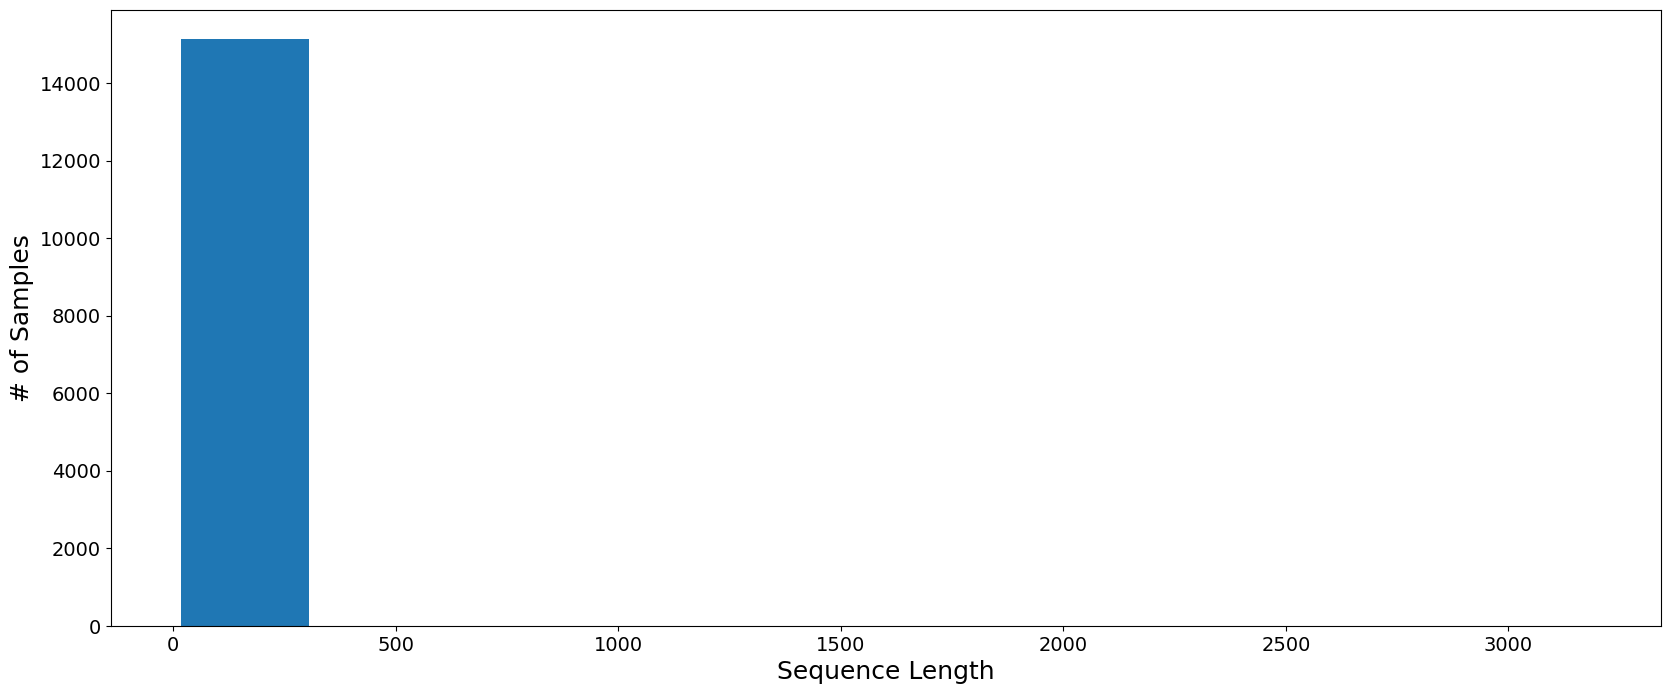

In [4]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')



MAX_LENGTH = 512 #Max length allowed for xlm roberta

tokenized_feature_raw = tokenizer.batch_encode_plus(
    df.text.values.tolist(),
    add_special_tokens = True,
    # max_length = MAX_LENGTH      
)

token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [5]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('xlm-roberta-base')



MAX_LENGTH = 512 #Max length allowed for xlm roberta

tokenized_feature_raw = tokenizer.batch_encode_plus(
    df.text.values.tolist(),
    add_special_tokens = True,
    # max_length = MAX_LENGTH      
)

token_sentence_length = [len(x) for x in tokenized_feature_raw['input_ids']]
print('max: ', max(token_sentence_length))
print('min: ', min(token_sentence_length))
# plot the distribution
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 8))
plt.hist(token_sentence_length, rwidth = 0.9)
plt.xlabel('Sequence Length', fontsize = 18)
plt.ylabel('# of Samples', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [6]:


# Not sure this is needed, since we have categories already as int?

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(target)
target_num = le.transform(target)
target_num


array([2, 5, 0, ..., 0, 2, 4])

In [7]:
from sklearn.model_selection import train_test_split


# Split dataset 80 - 20
# https://medium.com/@keruchen/train-a-xlm-roberta-model-for-text-classification-on-pytorch-4ccf0b30f762

train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(tokenized_feature['input_ids'], 
                                                                                                             target_num,
                                                                                                                    tokenized_feature['attention_mask'],
                                                                                                      random_state=2018, test_size=0.2)


In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.2 MB/s eta 0:00:00


In [8]:
import torch
from transformers import AdamW, get_linear_schedule_with_warmup

class SentimentDataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, index):
        return {
            'input_ids': torch.tensor(self.input_ids[index], dtype=torch.long),
            'attention_mask': torch.tensor(self.attention_masks[index], dtype=torch.long),
            'labels': torch.tensor(self.labels[index], dtype=torch.long)
        }

batch_size = 16

train_dataset = SentimentDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

validation_dataset = SentimentDataset(validation_inputs, validation_masks, validation_labels)
validation_dataloader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)

# Setting up the model
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_TYPE, num_labels=len(le.classes_))

# Setting up the optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=1.0292588174166536e-05, eps=1e-8)
epochs = 6
total_steps = len(train_dataloader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)

# Setting up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training the model
model.to(device)

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        optimizer.zero_grad()
        outputs = model(batch['input_ids'], 
                        attention_mask=batch['attention_mask'], 
                        labels=batch['labels'])
        loss = outputs[0]
        train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
    average_train_loss = train_loss / len(train_dataloader)
    
    model.eval()
    eval_loss = 0.0
    eval_accuracy = 0.0
    nb_eval_steps = 0
    for batch in validation_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        with torch.no_grad():
            outputs = model(batch['input_ids'],
                            attention_mask=batch['attention_mask'],
                            labels=batch['labels'])
        loss = outputs[0]
        eval_loss += loss.item()
        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        label_ids = batch['labels'].cpu().numpy()
        eval_accuracy += np.sum(np.argmax(logits, axis=1) == label_ids)
        nb_eval_steps += 1
    
    average_eval_loss = eval_loss / len(validation_dataloader)
    accuracy = eval_accuracy / len(validation_dataset)
    
    print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, Validation Accuracy: {:.4f}'.format(epoch+1, 
                                                                                                         average_train_loss, 
                                                                                                         average_eval_loss, 
                                                                                                         accuracy))

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense

Epoch: 1, Training Loss: 1.6328, Validation Loss: 1.5758, Validation Accuracy: 0.3873
Epoch: 2, Training Loss: 1.5384, Validation Loss: 1.4687, Validation Accuracy: 0.4345
Epoch: 3, Training Loss: 1.4372, Validation Loss: 1.4231, Validation Accuracy: 0.4592
Epoch: 4, Training Loss: 1.3496, Validation Loss: 1.4133, Validation Accuracy: 0.4662
Epoch: 5, Training Loss: 1.2764, Validation Loss: 1.4088, Validation Accuracy: 0.4747
Epoch: 6, Training Loss: 1.2274, Validation Loss: 1.4168, Validation Accuracy: 0.4804


In [ ]:
torch.save(model.state_dict(), "../content/Model.pt")

In [ ]:
# [I 2023-04-24 07:38:44,410] Trial 1 finished with value: 0.5051172003961704 and parameters: {'learning_rate': 1.0292588174166536e-05, 'epochs': 4}. Best is trial 1 with value: 0.5051172003961704.
model.eval()
predictions = []
with torch.no_grad():
    for batch in validation_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(batch['input_ids'], attention_mask=batch['attention_mask'])
        logits = outputs[0]
        logits = logits.detach().cpu().numpy()
        predictions.extend(np.argmax(logits, axis=1))

# predictions to a numpy array
predictions = np.array(predictions)

# the predictions
accuracy = np.mean(predictions == validation_labels)
print('Validation Accuracy: {:.4f}'.format(accuracy))

<ipython-input-8-b77d33eeebb6>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'input_ids': torch.tensor(self.input_ids[index], dtype=torch.long),
<ipython-input-8-b77d33eeebb6>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  'attention_mask': torch.tensor(self.attention_masks[index], dtype=torch.long),


Validation Accuracy: 0.5229


In [ ]:
# convert numeric label to string
print(predictions)
# final_prediction_list = le.inverse_transform(np.concatenate(predictions))
# final_truelabel_list = le.inverse_transform(np.concatenate(validation_labels))

# final_prediction_list
# array(['Extremely Negative', 'Negative', 'Extremely Negative',...,
#       'Extremely Positive', 'Extremely Negative', 'Positive'],
#      dtype='<U18')

from sklearn.metrics import confusion_matrix, classification_report
cr = classification_report(validation_labels, 
                           predictions, 
                           output_dict=False)
print(cr)

[4 2 0 ... 1 3 4]
              precision    recall  f1-score   support

           0       0.56      0.55      0.55       811
           1       0.45      0.42      0.43       539
           2       0.60      0.67      0.63       960
           3       0.39      0.33      0.36       201
           4       0.45      0.44      0.45       275
           5       0.37      0.34      0.35       243

    accuracy                           0.52      3029
   macro avg       0.47      0.46      0.46      3029
weighted avg       0.52      0.52      0.52      3029



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(95.72222222222221, 0.5, 'Predicted Sentiment Label')

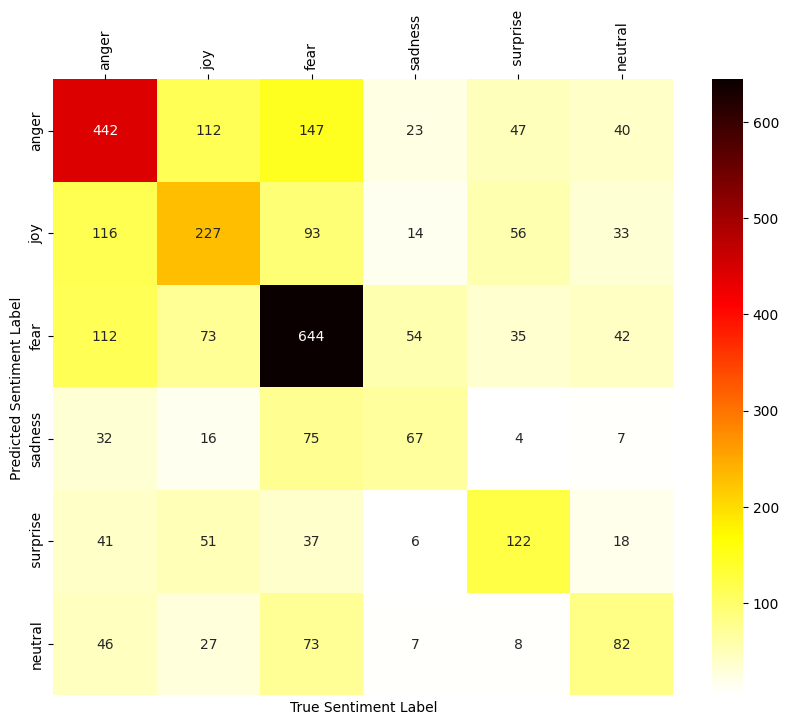

In [ ]:
# install seaborn
!pip install seaborn
# print cm heatmap
import seaborn as sns
# return class label
class_label = validation_labels
# get confusion matrix 
cm = confusion_matrix(validation_labels,
                      predictions)
# covert it to dataframe for plotting
# print(cm)
cm_df = pd.DataFrame(cm, 
                     index = ['anger','joy','fear', 'sadness',' surprise', 'neutral'], 
                     columns = ['anger','joy','fear', 'sadness',' surprise', 'neutral'])
# plot it 
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df, cmap = 'hot_r', annot=True, fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Sentiment Label")
g.set_ylabel("Predicted Sentiment Label")